<a href="https://colab.research.google.com/github/tomeliud/test_project/blob/master/Moringa_School_Tom_Kinyanjui_Njoroge_Independent_Project_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining our reserach question 

## **Research Question **

## **Importing our libraries **

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Loading, viewing, and Cleaning our datasets 

## **Fifa ranking dataset **

In [0]:
fifa = pd.read_csv('fifa_ranking.csv')

### **Description **

In [3]:
fifa.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [4]:
fifa.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


### **Checking the data**

In [5]:
#size
print("The dataset has " + str(fifa.shape[0]) + "rows, and " + str(fifa.shape[1]) + " columns")

The dataset has 57793rows, and 16 columns


In [6]:
#getting dementions 
fifa.ndim

2

In [7]:
print(fifa.nunique())

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64


In [8]:
#checking whether each column has appropraite datatype
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

### Tydying the dataset 

In [9]:
# checking for null values in any column
fifa.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [10]:
#duplicates 
fifa.duplicated().any()

True

In [11]:
#droping duplicates 
fifa.drop_duplicates()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [12]:
#stastical description of our dataset 
pd.options.display.float_format = "{:.3f}".format # supress the scientific format
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000
mean,101.628,122.069,332.303,-0.010,61.799,61.799,61.005,30.502,59.777,17.933,59.174,11.835
std,58.618,260.427,302.873,5.804,138.015,138.015,137.688,68.844,136.296,40.889,135.533,27.107
min,1.000,0.000,0.000,-72.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,51.000,0.000,56.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,101.000,0.000,272.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,152.000,92.790,525.000,1.000,32.250,32.250,26.660,13.330,21.500,6.450,21.250,4.250
max,209.000,1775.030,1920.000,92.000,1158.660,1158.660,1169.570,584.790,1159.710,347.910,1200.770,240.150


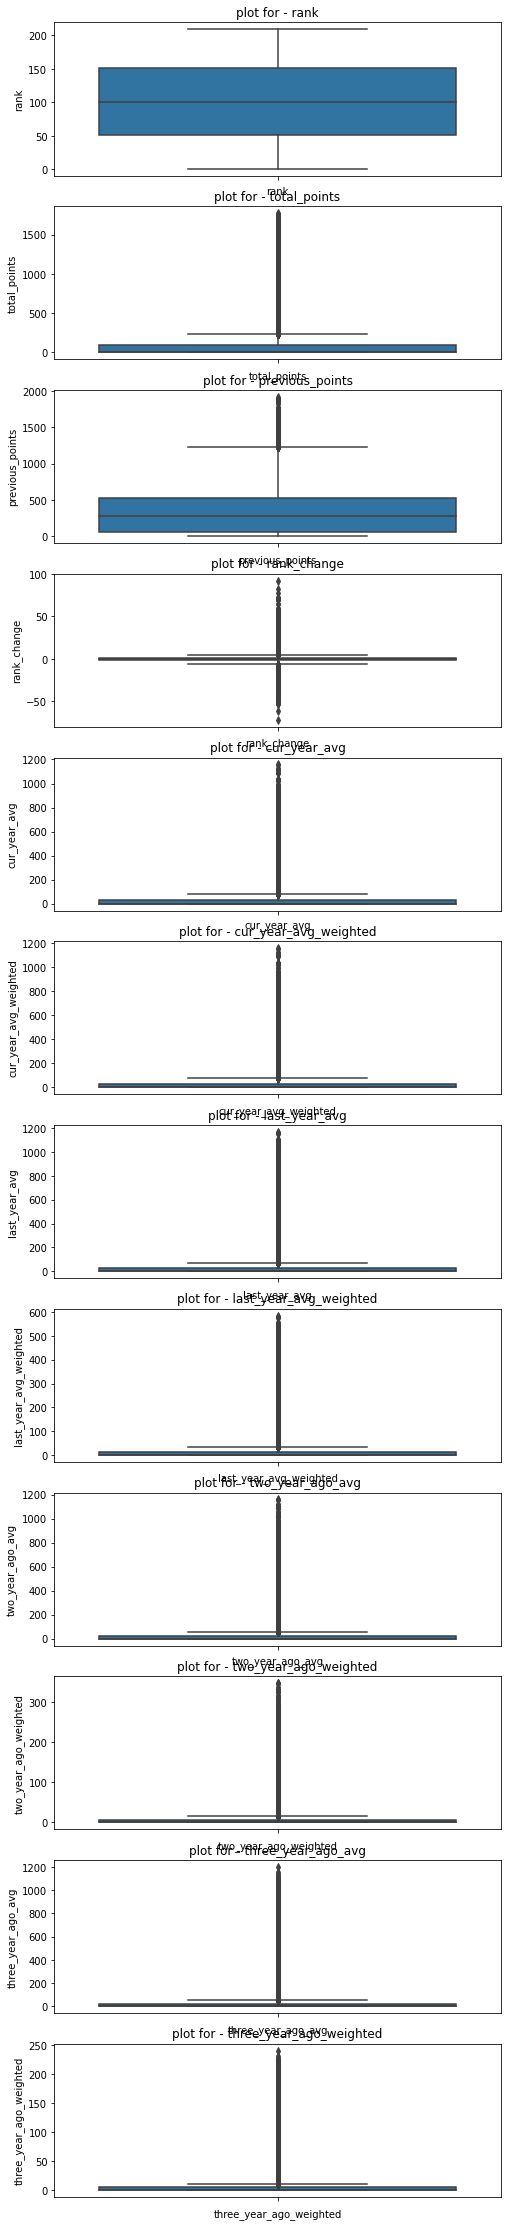

In [13]:
#checking for outliers within the dataset
select = [ 'rank'	,'total_points'	,'previous_points'	,'rank_change'	,'cur_year_avg'	,'cur_year_avg_weighted'	,'last_year_avg'	,'last_year_avg_weighted'	,'two_year_ago_avg'	,'two_year_ago_weighted'	,'three_year_ago_avg',	'three_year_ago_weighted'] 
fig, ax = plt.subplots(len(select), figsize=(8,40))
for i, values in enumerate(select):
  sns.boxplot(y=fifa[values], ax=ax[i])
  ax[i].set_title(f'plot for - {values}')
  ax[i].set_xlabel(values)
plt.show()

In [14]:
#dealing with outliers 
col_names_new = fifa[['rank'	,'total_points'	,'previous_points'	,'rank_change'	,'cur_year_avg'	,'cur_year_avg_weighted'	,'last_year_avg'	,'last_year_avg_weighted'	,'two_year_ago_avg'	,'two_year_ago_weighted'	,'three_year_ago_avg',	'three_year_ago_weighted']]
from scipy import stats 
x = np.abs(stats.zscore(col_names_new))
print(x)

[[1.71667796 0.46872927 0.90897952 ... 0.43858981 0.43660421 0.43660514]
 [1.69961833 0.46872927 0.90897952 ... 0.43858981 0.43660421 0.43660514]
 [1.6825587  0.46872927 0.93209173 ... 0.43858981 0.43660421 0.43660514]
 ...
 [1.78054627 0.46872927 1.09717888 ... 0.43858981 0.43660421 0.43660514]
 [1.78054627 0.46872927 1.09717888 ... 0.43858981 0.43660421 0.43660514]
 [1.78054627 0.46872927 1.09717888 ... 0.43858981 0.43660421 0.43660514]]


In [15]:
#confirming that outliers have been dropped from our dataset 
fifa_new = col_names_new[(x < 3).all(axis=1)]
print(f"Previous dataframe size : {col_names_new.shape[0]}")
print(f"New dataframe size: {fifa_new.shape[0]}")

Previous dataframe size : 57793
New dataframe size: 52792


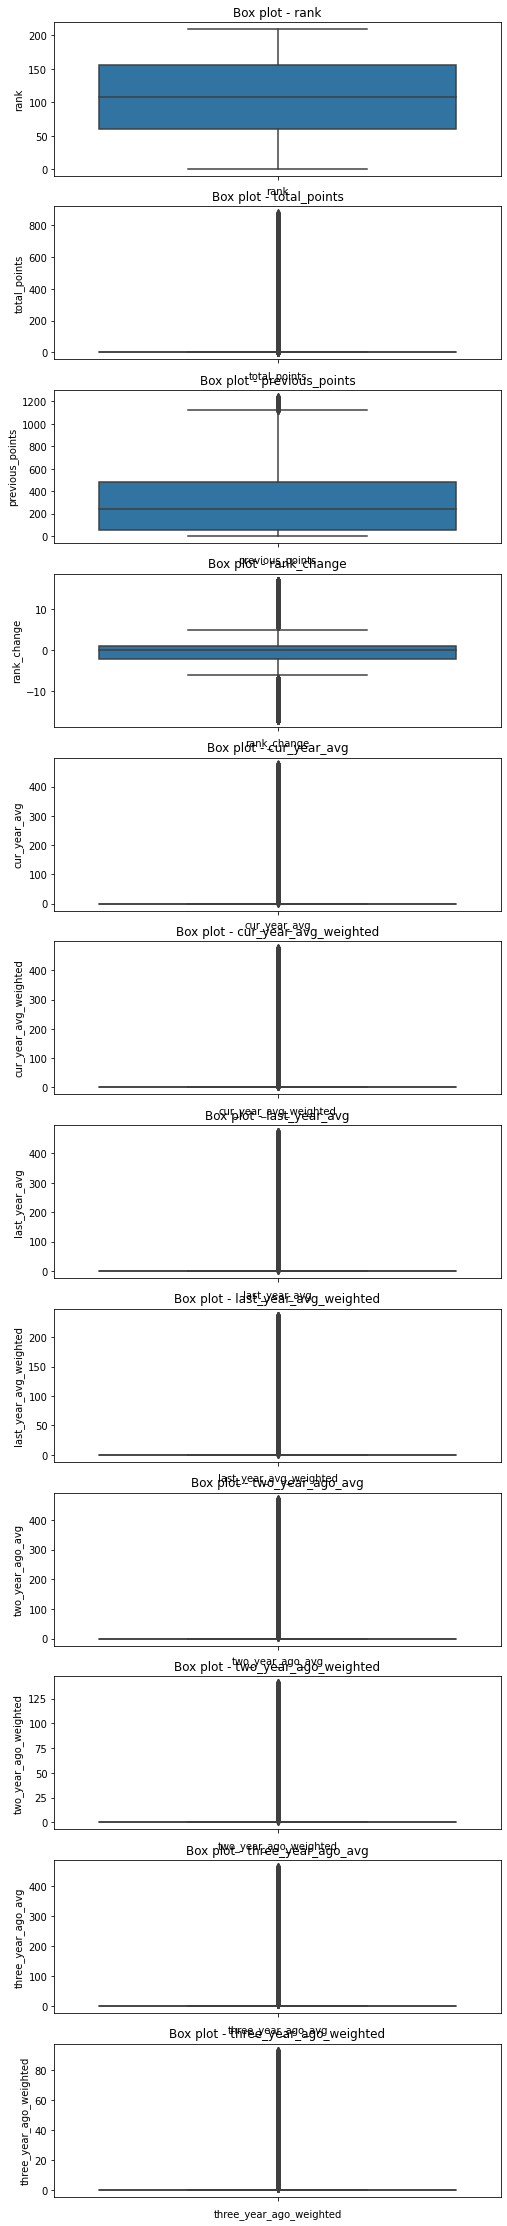

In [16]:
#checking if outliers have been removed 
col = ['rank'	,'total_points'	,'previous_points'	,'rank_change'	,'cur_year_avg'	,'cur_year_avg_weighted'	,'last_year_avg'	,'last_year_avg_weighted'	,'two_year_ago_avg'	,'two_year_ago_weighted'	,'three_year_ago_avg',	'three_year_ago_weighted']
fig, ax = plt.subplots(len(col), figsize=(8,40))
for i, values in enumerate(col):
  sns.boxplot(y=fifa_new[values], ax=ax[i])
  ax[i].set_title(f'Box plot - {values}')
  ax[i].set_xlabel(values)
plt.show()

In [0]:
#saving our cleaned dataset
fifa.to_csv('Cleaned_fifa.csv')

## **Results Dataset**

In [0]:
results = pd.read_csv('results.csv')

### Description

In [18]:
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [19]:
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


### Checking the data

In [20]:
#size
print('The dataset has ' + str(results.shape[0]) + 'rows and ' + str(results.shape[1]) + 'columns')

The dataset has 40839rows and 9columns


In [21]:
#getting dimentions 
results.ndim 

2

In [22]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [23]:
#checking whether each column has appropriate datatypes 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


### Tydying the dataset

In [24]:
#checking for null values in any column
results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [25]:
#checking for duplicates 
results.duplicated().any()

False

In [26]:
#statistical despription of our dataset
pd.options.display.float_format =  "{:.3f}".format
results.describe() 

,home_score,away_score
count,40839.000,40839.000
mean,1.746,1.188
std,1.749,1.405
min,0.000,0.000
25%,1.000,0.000
50%,1.000,1.000
75%,2.000,2.000
max,31.000,21.000


 Outlier ranges are:
 [[4, 4, 7, 9, 5, 5, 5, 7, 5, 5, 5, 5, 7, 6, 4, 4, 8, 5, 4, 7, 4, 4, 4, 5, 11, 5, 4, 4, 6, 7, 5, 5, 7, 4, 6, 6, 6, 6, 6, 5, 4, 5, 9, 6, 4, 6, 4, 5, 4, 5, 13, 4, 9, 5, 4, 11, 6, 5, 5, 4, 4, 7, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 4, 11, 5, 5, 4, 5, 4, 5, 7, 4, 4, 6, 6, 5, 4, 6, 5, 7, 4, 9, 7, 4, 9, 5, 4, 4, 7, 4, 4, 4, 8, 8, 9, 4, 4, 6, 4, 5, 4, 4, 4, 4, 5, 7, 6, 8, 4, 5, 6, 5, 6, 6, 4, 7, 4, 8, 6, 4, 4, 12, 4, 5, 5, 4, 6, 4, 5, 4, 4, 4, 6, 4, 9, 5, 4, 4, 6, 4, 4, 7, 6, 4, 4, 4, 4, 7, 7, 4, 10, 4, 5, 4, 4, 6, 8, 5, 4, 5, 5, 4, 4, 4, 6, 4, 7, 5, 4, 4, 6, 4, 10, 4, 5, 5, 5, 4, 4, 4, 4, 6, 5, 4, 7, 5, 4, 5, 4, 5, 6, 4, 7, 6, 5, 4, 4, 5, 4, 4, 4, 6, 4, 4, 4, 4, 5, 4, 7, 4, 6, 7, 7, 5, 8, 5, 6, 6, 4, 4, 6, 4, 4, 4, 12, 13, 6, 4, 6, 5, 7, 5, 4, 6, 5, 7, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 5, 4, 7, 5, 7, 4, 5, 8, 4, 4, 9, 4, 4, 6, 4, 4, 4, 10, 5, 4, 5, 8, 4, 4, 4, 5, 6, 6, 7, 4, 5, 6, 5, 8, 5, 6, 6, 6, 6, 4, 6, 4, 6, 6, 4, 4, 4, 4, 6, 4, 5, 5, 5, 6, 6, 4, 6, 5, 9, 7, 4, 6, 4, 5, 5, 

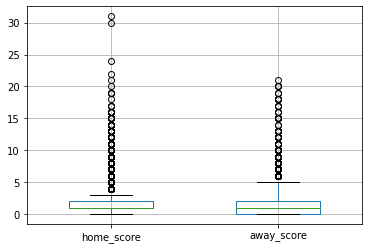

In [27]:
# Checking for Outliers
n1 = results[['home_score', 'away_score']]
# Plotting ourliters for the numeric columns
_t, n_columns = pd.DataFrame.boxplot(n1, return_type='both', widths=0.5)
outliers = [flier.get_ydata() for flier in n_columns['fliers']]
out_list = [i.tolist() for i in outliers]
print(f" Outlier ranges are:\n { out_list}")

In [28]:
#dealing with outliers 
col_names = results[['home_score', 'away_score']]
from scipy import stats 
x = np.abs(stats.zscore(col_names))
print(x)

[[0.99804774 0.84556424]
 [1.28881193 0.57781937]
 [0.1453821  0.13387244]
 ...
 [0.99804774 0.13387244]
 [0.99804774 0.13387244]
 [0.42633282 0.13387244]]


 Outlier ranges are:
 [[4, 4, 7, 9, 5, 5, 5, 7, 5, 5, 5, 5, 7, 6, 4, 4, 8, 5, 4, 7, 4, 4, 4, 5, 11, 5, 4, 4, 6, 7, 5, 5, 7, 4, 6, 6, 6, 6, 6, 5, 4, 5, 9, 6, 4, 6, 4, 5, 4, 5, 13, 4, 9, 5, 4, 11, 6, 5, 5, 4, 4, 7, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 4, 11, 5, 5, 4, 5, 4, 5, 7, 4, 4, 6, 6, 5, 4, 6, 5, 7, 4, 9, 7, 4, 9, 5, 4, 4, 7, 4, 4, 4, 8, 8, 9, 4, 4, 6, 4, 5, 4, 4, 4, 4, 5, 7, 6, 8, 4, 5, 6, 5, 6, 6, 4, 7, 4, 8, 6, 4, 4, 12, 4, 5, 5, 4, 6, 4, 5, 4, 4, 4, 6, 4, 9, 5, 4, 4, 6, 4, 4, 7, 6, 4, 4, 4, 4, 7, 7, 4, 10, 4, 5, 4, 4, 6, 8, 5, 4, 5, 5, 4, 4, 4, 6, 4, 7, 5, 4, 4, 6, 4, 10, 4, 5, 5, 5, 4, 4, 4, 4, 6, 5, 4, 7, 5, 4, 5, 4, 5, 6, 4, 7, 6, 5, 4, 4, 5, 4, 4, 4, 6, 4, 4, 4, 4, 5, 4, 7, 4, 6, 7, 7, 5, 8, 5, 6, 6, 4, 4, 6, 4, 4, 4, 12, 13, 6, 4, 6, 5, 7, 5, 4, 6, 5, 7, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 5, 4, 7, 5, 7, 4, 5, 8, 4, 4, 9, 4, 4, 6, 4, 4, 4, 10, 5, 4, 5, 8, 4, 4, 4, 5, 6, 6, 7, 4, 5, 6, 5, 8, 5, 6, 6, 6, 6, 4, 6, 4, 6, 6, 4, 4, 4, 4, 6, 4, 5, 5, 5, 6, 6, 4, 6, 5, 9, 7, 4, 6, 4, 5, 5, 

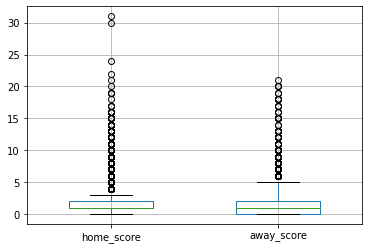

In [29]:
#confirming that our aoutliers have been dropped 
n2 = results[['home_score', 'away_score']]

_t, n_columns = pd.DataFrame.boxplot(n2, return_type='both', widths=0.5)
outliers = [flier.get_ydata() for flier in n_columns['fliers']]
out_list = [i.tolist() for i in outliers]
print(f" Outlier ranges are:\n { out_list}")

In [0]:
#saving our cleaned dataset 
results.to_csv('Cleaned_results.csv')

## Merging our datasets

In [33]:
fifa_df = pd.read_csv('Cleaned_fifa.csv')
fifa_df

,Unnamed: 0,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,0,1,Germany,GER,0.000,57,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
1,1,2,Italy,ITA,0.000,57,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
2,2,3,Switzerland,SUI,0.000,50,9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
3,3,4,Sweden,SWE,0.000,55,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
4,4,5,Argentina,ARG,0.000,51,5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,57788,206,Anguilla,AIA,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONCACAF,2018-06-07
57789,57789,206,Bahamas,BAH,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONCACAF,2018-06-07
57790,57790,206,Eritrea,ERI,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,2018-06-07
57791,57791,206,Somalia,SOM,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,2018-06-07


In [34]:
results_df = pd.read_csv('Cleaned_results.csv')
results_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...,...
40834,40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [38]:
#merging our cleaned datasets as shown above 
fifa_results = pd.merge(fifa_df, results_df, left_on= ['rank_date', 'country_full'], right_on=['date', 'country'], how='inner')
fifa_results

,Unnamed: 0_x,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Unnamed: 0_y,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,7,8,Brazil,BRA,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,34,35,Ecuador,ECU,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,49,50,Zimbabwe,ZIM,0.000,27,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,1993-08-08,17921,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False
3,58,59,Bolivia,BOL,0.000,13,28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,64,65,Guinea,GUI,0.000,23,-2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,1993-08-08,17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,57594,12,England,ENG,1050.840,1040,1,476.420,476.420,593.510,296.750,580.490,174.150,517.600,103.520,UEFA,2018-06-07,39833,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True
946,57595,14,Uruguay,URU,1018.410,976,3,486.280,486.280,487.690,243.840,561.470,168.440,599.260,119.850,CONMEBOL,2018-06-07,39821,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False
947,57603,22,Iceland,ISL,908.010,930,0,438.640,438.640,564.250,282.130,302.020,90.610,483.190,96.640,UEFA,2018-06-07,39824,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False
948,57607,26,Austria,AUT,844.700,841,0,456.270,456.270,229.280,114.640,503.420,151.020,613.800,122.760,UEFA,2018-06-07,39823,2018-06-07,South Korea,Bolivia,0,0,Friendly,Innsbruck,Austria,True


## Saving our merged dataset 

In [0]:
fifa_results.to_csv('football_dataset.csv')

### Previewing our merged dataset

In [0]:
df_fifa = pd.read_csv('football_dataset.csv')

In [41]:
df_fifa.head(5)

,Unnamed: 0,Unnamed: 0_x,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Unnamed: 0_y,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,7,8,Brazil,BRA,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,1,34,35,Ecuador,ECU,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,2,49,50,Zimbabwe,ZIM,0.000,27,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,1993-08-08,17921,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False
3,3,58,59,Bolivia,BOL,0.000,13,28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,4,64,65,Guinea,GUI,0.000,23,-2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,1993-08-08,17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False


In [42]:
df_fifa.tail(3)

,Unnamed: 0,Unnamed: 0_x,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Unnamed: 0_y,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
947,947,57603,22,Iceland,ISL,908.010,930,0,438.640,438.640,564.250,282.130,302.020,90.610,483.190,96.640,UEFA,2018-06-07,39824,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False
948,948,57607,26,Austria,AUT,844.700,841,0,456.270,456.270,229.280,114.640,503.420,151.020,613.800,122.760,UEFA,2018-06-07,39823,2018-06-07,South Korea,Bolivia,0,0,Friendly,Innsbruck,Austria,True
949,949,57678,97,India,IND,349.920,354,0,196.240,196.240,222.360,111.180,85.000,25.500,85.000,17.000,AFC,2018-06-07,39826,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,Mumbai,India,False


In [43]:
#size
print('The dataset has ' + str(df_fifa.shape[0]) + ' rows ' + str(df_fifa.shape[1]) + ' columns')

The dataset has 950 rows 28 columns


In [44]:
df_fifa.nunique()

Unnamed: 0                 950
Unnamed: 0_x               854
rank                       177
country_full               156
country_abrv               156
total_points                74
previous_points            532
rank_change                 37
cur_year_avg                71
cur_year_avg_weighted       71
last_year_avg               71
last_year_avg_weighted      71
two_year_ago_avg            69
two_year_ago_weighted       69
three_year_ago_avg          71
three_year_ago_weighted     70
confederation                6
rank_date                  163
Unnamed: 0_y               950
date                       163
home_team                  189
away_team                  196
home_score                  14
away_score                  11
tournament                  36
city                       406
country                    156
neutral                      2
dtype: int64

In [45]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               950 non-null    int64  
 1   Unnamed: 0_x             950 non-null    int64  
 2   rank                     950 non-null    int64  
 3   country_full             950 non-null    object 
 4   country_abrv             950 non-null    object 
 5   total_points             950 non-null    float64
 6   previous_points          950 non-null    int64  
 7   rank_change              950 non-null    int64  
 8   cur_year_avg             950 non-null    float64
 9   cur_year_avg_weighted    950 non-null    float64
 10  last_year_avg            950 non-null    float64
 11  last_year_avg_weighted   950 non-null    float64
 12  two_year_ago_avg         950 non-null    float64
 13  two_year_ago_weighted    950 non-null    float64
 14  three_year_ago_avg       9

# Data cleaning 

In [0]:
#droping uncesaary columns 
fifa_df = df_fifa.drop(['Unnamed: 0', 'Unnamed: 0_x', 'country_abrv', 'Unnamed: 0_y'], axis=1)

In [47]:
#checking for duplicates 
fifa_df.duplicated().any()

False

In [48]:
fifa_df.isnull().any()

rank                       False
country_full               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
date                       False
home_team                  False
away_team                  False
home_score                 False
away_score                 False
tournament                 False
city                       False
country                    False
neutral                    False
dtype: bool

In [0]:
#saving our cleaned dataset 
fifa_df.to_csv('cleaned_fifa_final.csv')

In [0]:
fifa_df = pd.read_csv('cleaned_fifa_final.csv')

# Exploratory Data Anlysis 

### Univariate analysis 

In [53]:
fifa_df.head(3)

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,8,Brazil,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,35,Ecuador,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,50,Zimbabwe,0.000,27,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,1993-08-08,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False


Categorical variables 

In [0]:
categorical_varr = fifa_df[['country', 'total_points', 'confederation', 'tournament', 'neutral']]

In [55]:
for i in categorical_varr:
  print(fifa_df[i].value_counts())
  print('***********************')

France        24
England       23
Portugal      19
Qatar         19
Cyprus        18
              ..
Mongolia       1
Seychelles     1
Bhutan         1
Pakistan       1
Rwanda         1
Name: country, Length: 156, dtype: int64
***********************
0.000       854
1050.840      8
260.390       4
741.500       4
477.420       3
           ... 
765.390       1
453.280       1
1053.990      1
93.940        1
1263.290      1
Name: total_points, Length: 74, dtype: int64
***********************
UEFA        482
AFC         219
CAF         106
CONMEBOL     71
CONCACAF     63
OFC           9
Name: confederation, dtype: int64
***********************
Friendly                                      600
FIFA World Cup qualification                  153
UEFA Euro qualification                        41
AFC Asian Cup qualification                    37
CONIFA World Football Cup                      15
Cyprus International Tournament                 8
Gulf Cup                                        7

### Bar plots 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

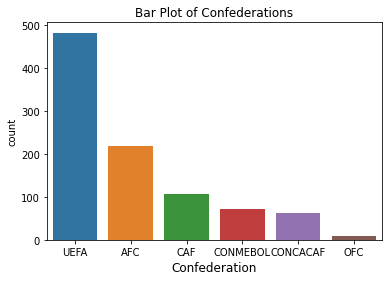

In [56]:
#Confederation bar plot 
sns.countplot(fifa_df['confederation'], order= fifa_df['confederation'].value_counts().index)
plt.title('Bar Plot of Confederations')
plt.xlabel('Confederation', fontsize=12)
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Frequency of different types of Tournaments')

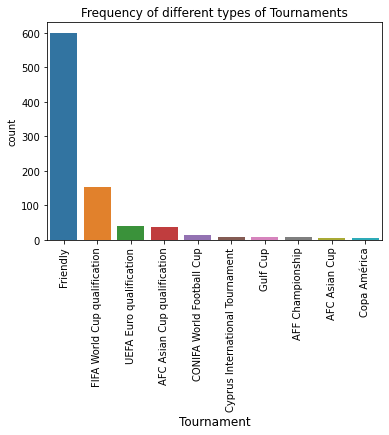

In [57]:
#Tournament bar plot
#However, since the tournaments are too many we will compare the total no of time the first 10 tornaments occur
sns.countplot(fifa_df['tournament'], order= fifa_df['tournament'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.xlabel('Tournament', fontsize=12)
plt.title('Frequency of different types of Tournaments')

Text(0.5, 1.0, 'Frequency of different Countries')

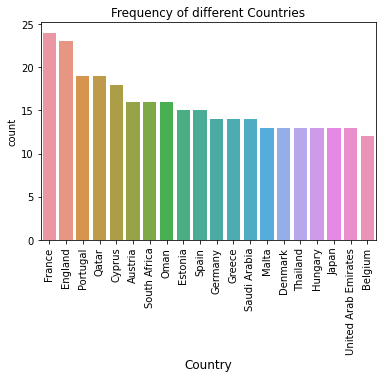

In [58]:
#Country bar plot 
#However, we look at the number of participation of the first 20 countries since the countries are too many
sns.countplot(fifa_df['country'], order= fifa_df['country'].value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.xlabel('Country', fontsize=12)
plt.title('Frequency of different Countries')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

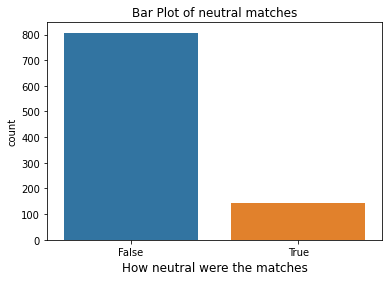

In [59]:
#Bar plot for the neutral matches 
sns.countplot(fifa_df['neutral'], order= fifa_df['neutral'].value_counts().index)
plt.title('Bar Plot of neutral matches')
plt.xlabel('How neutral were the matches', fontsize=12)
plt.xticks(rotation = 0)

### Pie Charts 

Text(0.5, 1.0, '% of Confederations')

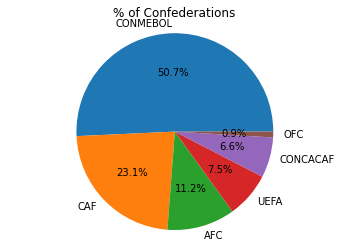

In [60]:
# % of confedaration in relation to percentage frequency
confed = fifa_df['confederation'].groupby(fifa_df['confederation']).count().sort_values(ascending=False)
count = fifa_df['confederation'].unique()

plt.pie(confed, labels= count, autopct='%1.1f%%')
plt.axis('equal')
plt.title('% of Confederations')

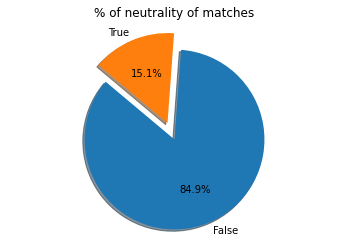

In [61]:
# % of True to False matches 
matches = fifa_df['neutral'].groupby(fifa_df['neutral']).count().sort_values(ascending=False)
total = fifa_df['neutral'].unique()

explode = (0.2,0)

plt.pie(matches, labels= total,explode= explode, autopct= '%1.1f%%', startangle= 140,shadow = True)
plt.axis('equal')
plt.title('% of neutrality of matches')
plt.show()

# Bivariate analysis 

### Scatter plots 

In [65]:
# Created a New Dataset
countries = ['France','England','Portugal','Qatar','Cyprus','Austria','South Africa']
tournament = []

new_data_dict = {}
for i in countries:
    types = []
    for j in tournament:
        types.append(fifa_df[j][fifa_df['tournament'] == i].sum())
    new_data_dict[i] = types
fp_new = pd.DataFrame(new_data_dict)

fp_new.head()
fp_new['tournament'] = np.arange(tournament)

TypeError: ignored

# Polynomial regression 

In [88]:
dataset.head(1)

,Unnamed: 0,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,8,Brazil,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataset = pd.read_csv('cleaned_fifa_final.csv')
print(dataset)
#getting the columns that we will be using i.e. total points and previous points  
X = dataset.iloc[:, 3:4].values
Y = dataset.iloc[:, 3].values
print(X)
print(Y)

     Unnamed: 0  rank country_full  ...        city   country  neutral
0             0     8       Brazil  ...      Maceió    Brazil    False
1             1    35      Ecuador  ...       Quito   Ecuador    False
2             2    50     Zimbabwe  ...      Harare  Zimbabwe    False
3             3    59      Bolivia  ...      La Paz   Bolivia    False
4             4    65       Guinea  ...     Conakry    Guinea    False
..          ...   ...          ...  ...         ...       ...      ...
945         945    12      England  ...  Carshalton   England     True
946         946    14      Uruguay  ...  Montevideo   Uruguay    False
947         947    22      Iceland  ...   Reykjavík   Iceland    False
948         948    26      Austria  ...   Innsbruck   Austria     True
949         949    97        India  ...      Mumbai     India    False

[950 rows x 25 columns]
[[   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [   0.  ]
 [

### Analysis of the dataset 

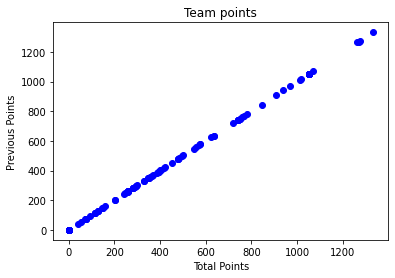

In [117]:
plt.scatter(X, Y, color='blue') 
plt.title('Team points')
plt.xlabel('Total Points')
plt.ylabel('Previous Points')
plt.show()

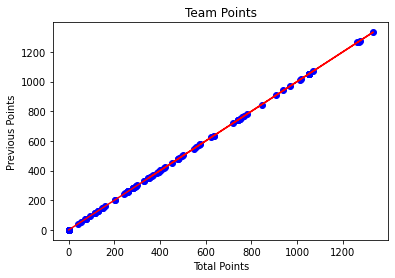

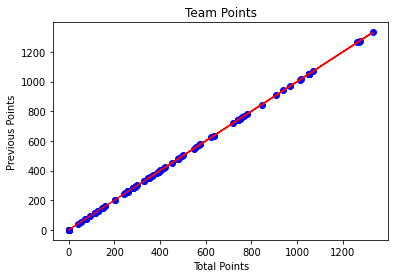

In [118]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,Y)

# Visualize the Linear Regression results
plt.scatter(X, Y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Team Points')
plt.xlabel('Total Points')
plt.ylabel('Previous Points')
plt.show()
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

#Visualize the Polynomial Regression results
plt.scatter(X, Y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Team Points')
plt.xlabel('Total Points')
plt.ylabel('Previous Points')
plt.show()

In [119]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))

Linear prediction: 6
Polynomial prediction: 6


# Cross validation 

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# We will use 2 independent variables for this
X = dataset[['total_points', 'previous_points']].values
y = dataset['rank'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.890482472924557
Mean Squared Error: 1391.8857310651288
Root Mean Squared Error: 37.30798481645891


In [122]:
#lets try using k-folds 
from sklearn.model_selection import KFold
X = dataset[['total_points', 'previous_points']].values
y = dataset['rank'].values

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')


RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  

  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 90.61856551671447

Training model 2
Model 2 Root Mean Squared Error: 34.85005761485982

Training model 3
Model 3 Root Mean Squared Error: 31.419016507898757

Training model 4
Model 4 Root Mean Squared Error: 30.42472221665122

Training model 5
Model 5 Root Mean Squared Error: 36.6411257539017


In [124]:
#using variant k-flods 
from sklearn.model_selection import LeaveOneOut


X = dataset[['total_points', 'previous_points']].values
y = dataset['rank'].values

folds = LeaveOneOut()


print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 0 
for train_index, test_index in folds.split(X):
  
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 950 folds
trained 950 models


28.265653535976586

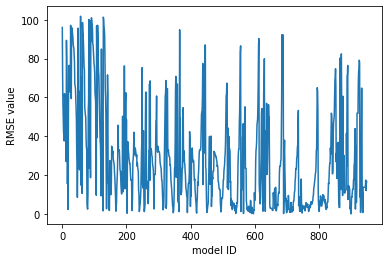

In [125]:
#plot of the RSME 
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

# Logistic regression 

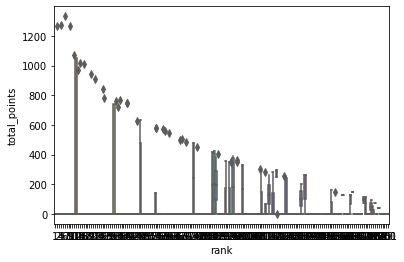

In [132]:
# how total_points are related to rank 
sns.boxplot(x='rank', y='total_points', data=dataset, palette='hls')

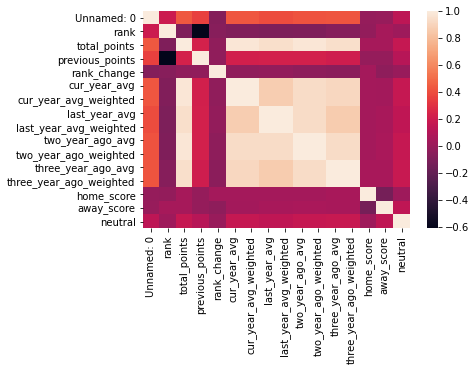

In [142]:
#Heatmap correlation 
fifa_co = pd.concat([dataset], axis=1)
sns.heatmap(fifa_co.corr())

In [120]:
dataset.head(2)

,Unnamed: 0,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,8,Brazil,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,1,35,Ecuador,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
